# Visualization: CRC

Losses:
- binary w/ threshold
- Miscoverage
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from typing import Literal
import json

from cose.utils import load_project_paths
from app.tools import setup_mmseg_inference
from cose.conformal import split_dataset_idxs
from mmengine.registry import init_default_scope  # type: ignore

init_default_scope("mmseg")


# device_str = "cuda:0"
device_str = "cuda:1"
# device_str = "cpu"
device = torch.device(device_str)

prj_path = load_project_paths().COSE_PATH

# dataset: Literal["Cityscapes", "ADE20K", "LoveDA"]

dataset_name = "Cityscapes"
# dataset_name = "ADE20K"
# dataset_name = "LoveDA"

# loss: Literal["binary", "miscoverage"]
# loss = "miscoverage"
loss = "binary"


if dataset_name == "Cityscapes" and loss == "binary":
    ## mincov: 1.0, alpha=0.01
    # config_json = f"{prj_path}/experiments/outputs/Cityscapes/binary_loss/specials/20240324_19h55m10s_Cityscapes__id_101__alpha_0.01__mincov_1.0__binary_loss.json"

    ## mincov: 0.99, alpha=0.1
    # config_json = f"{prj_path}/experiments/outputs/Cityscapes/binary_loss/20240315_12h26m41s_Cityscapes__id_101__alpha_0.1__binary_loss.json"

    ## mincov: 0.99, alpha=0.01
    config_json = f"{prj_path}/experiments/outputs/Cityscapes/binary_loss/20240315_14h13m06s_Cityscapes__id_101__alpha_0.01__binary_loss.json"

    ## mincov: 0.999, alpha=0.01
    # config_json = f"{prj_path}/experiments/outputs/Cityscapes/binary_loss/20240324_18h01m06s_Cityscapes__id_101__alpha_0.01__mincov_0.999__binary_loss.json"


elif dataset_name == "Cityscapes" and loss == "miscoverage":
    config_json = f"{prj_path}/experiments/outputs/Cityscapes/miscoverage_loss/20240302_21h57m00s_Cityscapes__id_101__alpha_0.01__miscoverage_loss.json"
else:
    raise ValueError("Unknown config: could not json file")

my_config = json.load(open(config_json))
n_calib = my_config["n_calib"]
print(f"{my_config['mincov'] = }")
print(my_config.keys())
print(f"{my_config['experiment_id'] = }")

dataset, model, input_paths = setup_mmseg_inference(
    device, dataset_name, my_config["experiment_id"], n_calib=n_calib
)
# model = model["model"]
#
_cal_ids, test_ids = split_dataset_idxs(
    len_dataset=len(dataset),
    n_calib=my_config["n_calib"],
    random_seed=my_config["experiment_id"],
)

my_config['mincov'] = 0.99
dict_keys(['expe_name', 'alpha', 'alpha_risk_bound', 'early_stopped', 'mincov', 'dataset', 'experiment_id', 'optimal_lambda', 'loss_function', 'risks', 'lbd_search_params', 'n_calib', 'cal_id'])
my_config['experiment_id'] = 101


/home/luca.mossina/projects/vision/cose/.venv/lib/python3.9/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/luca.mossina/projects/vision/cose/.venv/lib/python3.9/site-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /home/luca.mossina/projects/vision/cose/models/Cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [2]:
len(dataset.classes)

19

In [2]:
## Find an image with interesting elements for paper's figures
import mmcv

image_id_ = None

show_some_images = False
if show_some_images:
    for _, idx in enumerate(test_ids[:150]):
        plt.figure(figsize=(3, 3))
        print(f"[LUCA dbg] {idx = }")
        img_path = dataset[idx]["data_samples"].img_path
        print(f"[LUCA dbg] {img_path = }")
        #
        # for i in range(4):
        print(f"[LUCA dbg] {idx = }")
        im_path = dataset[idx]["data_samples"].img_path
        print(f"[LUCA dbg] {im_path = }")
        im = mmcv.imread(im_path)
        plt.imshow(mmcv.bgr2rgb(im))
        plt.show()

[LUCA dbg] im_path = '/home/luca.mossina/datasets/Cityscapes/leftImg8bit/val/frankfurt/frankfurt_000001_012870_leftImg8bit.png'


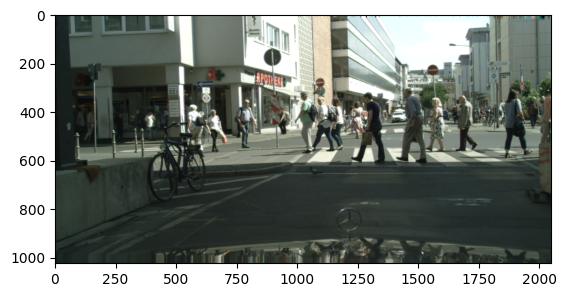

In [3]:
if dataset_name == "Cityscapes":
    # image_id_ = 7
    # image_id_ = 61
    # image_id_ = 68
    image_id_ = 85  # pedestrians, signs, bicycles, pigeon on the road
    # image_id_ = 128
    # image_id_ = 140  ## people carrying suitcases

    im_path = dataset[image_id_]["data_samples"].img_path
    print(f"[LUCA dbg] {im_path = }")
    im = mmcv.imread(im_path)
    plt.imshow(mmcv.bgr2rgb(im))
    plt.show()

Loads checkpoint by local backend from path: /home/luca.mossina/projects/vision/cose/models/Cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


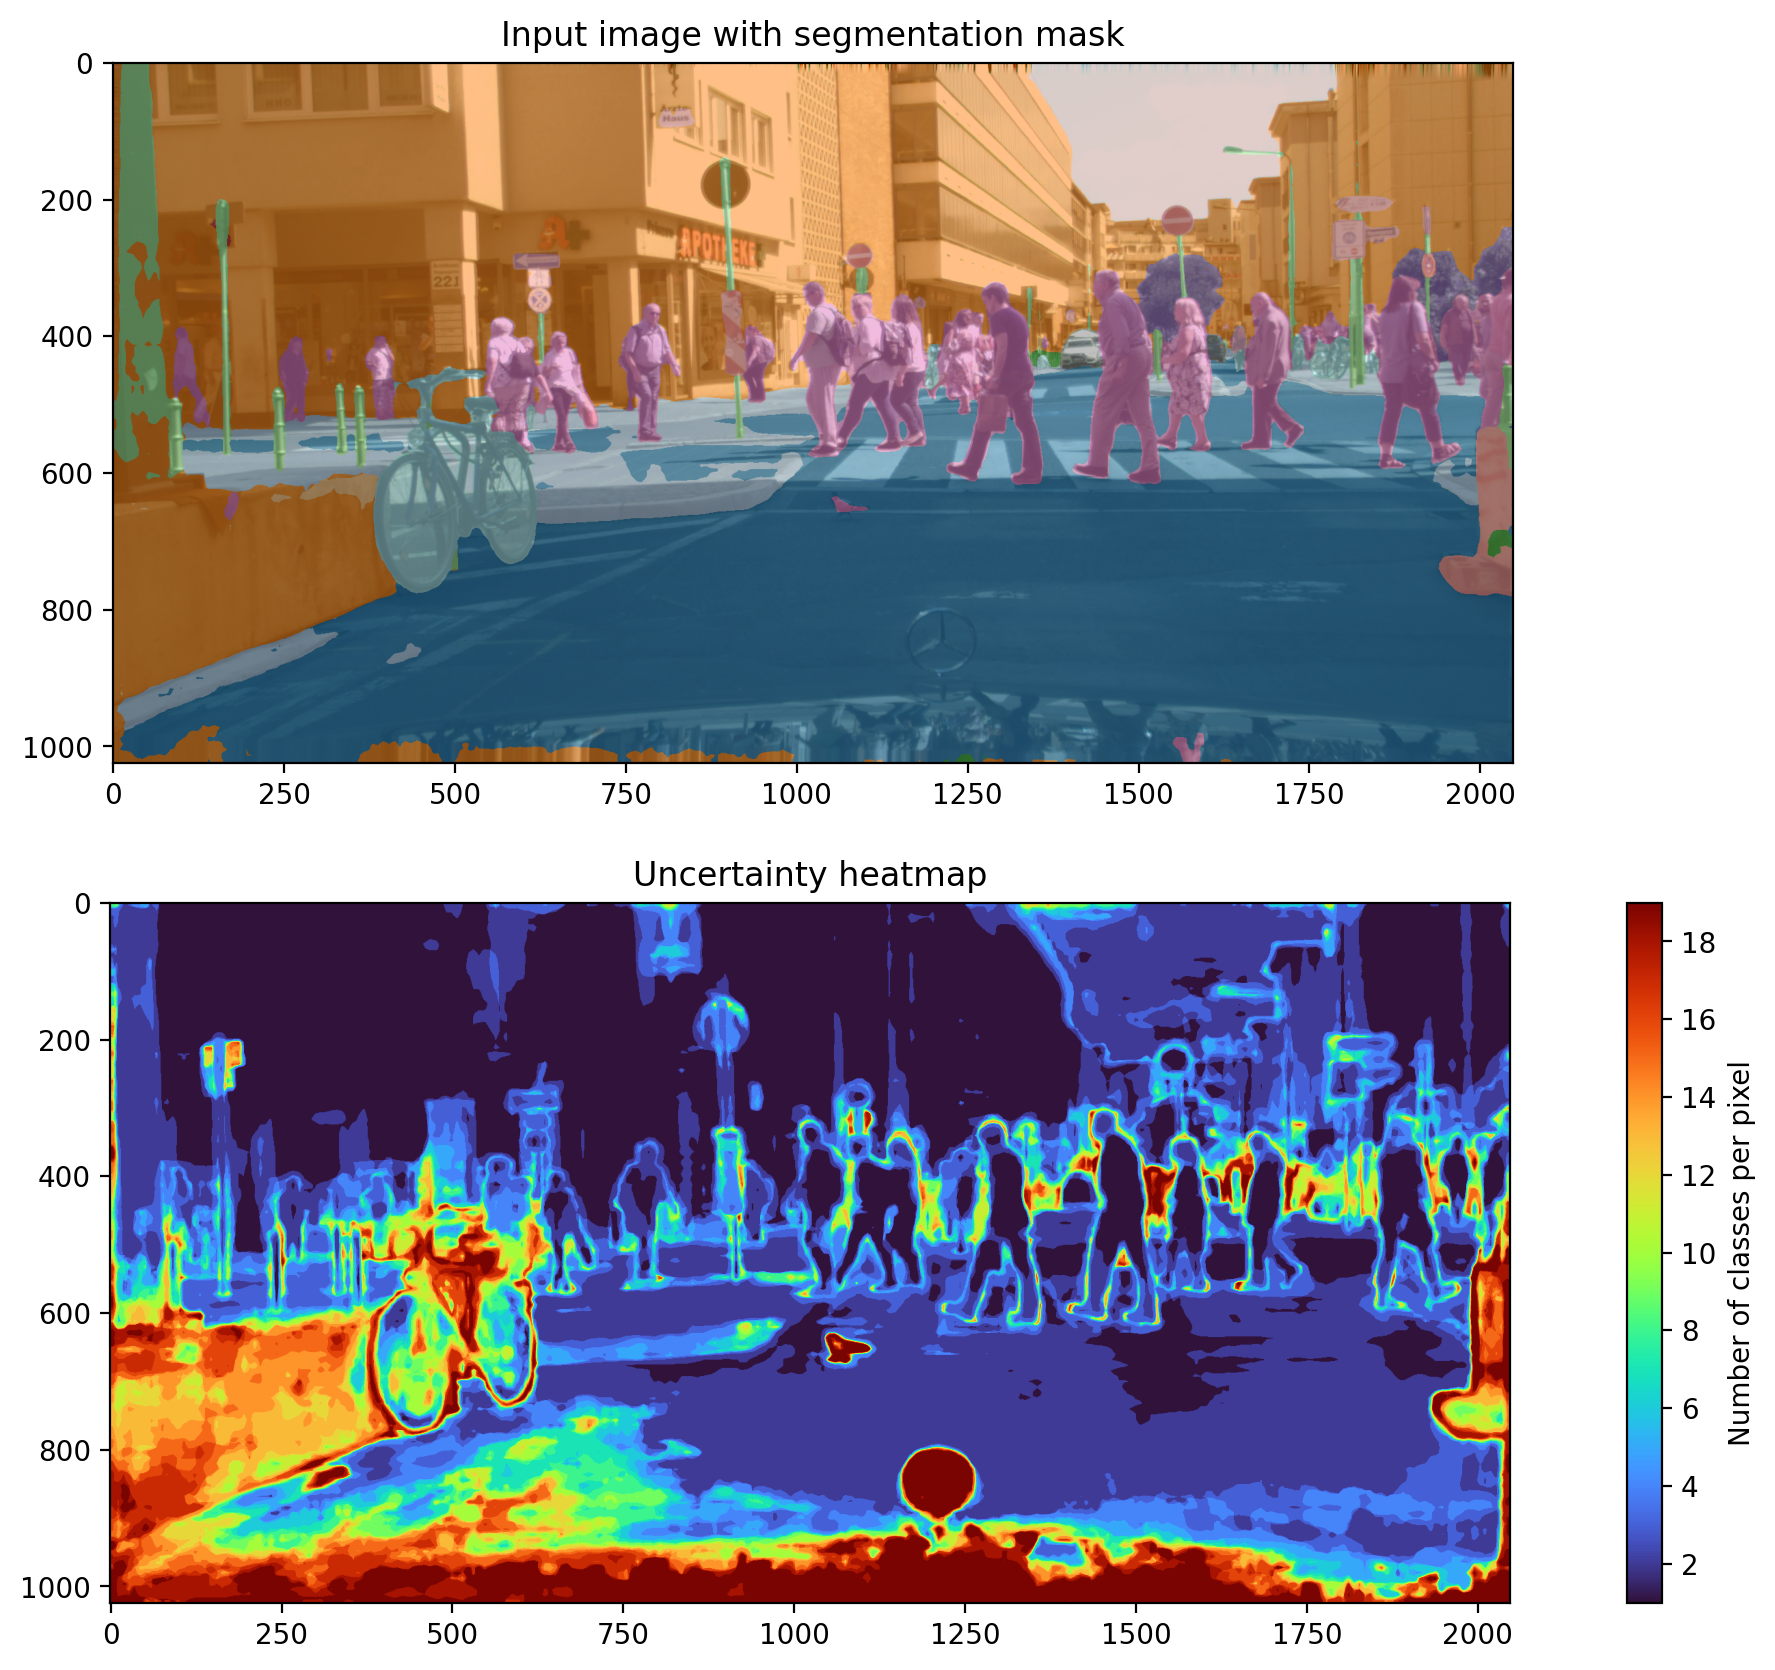

In [4]:
from make_figures import plot_heatmap_from_input_img_path

plot_heatmap_from_input_img_path(
    input_img_path=im_path,
    expe_config=my_config,
    normalize_by_total_number_of_classes=True,
)

## Thresholding: visualize how $\lambda$ determines the heatmap

Loads checkpoint by local backend from path: /home/luca.mossina/projects/vision/cose/models/Cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


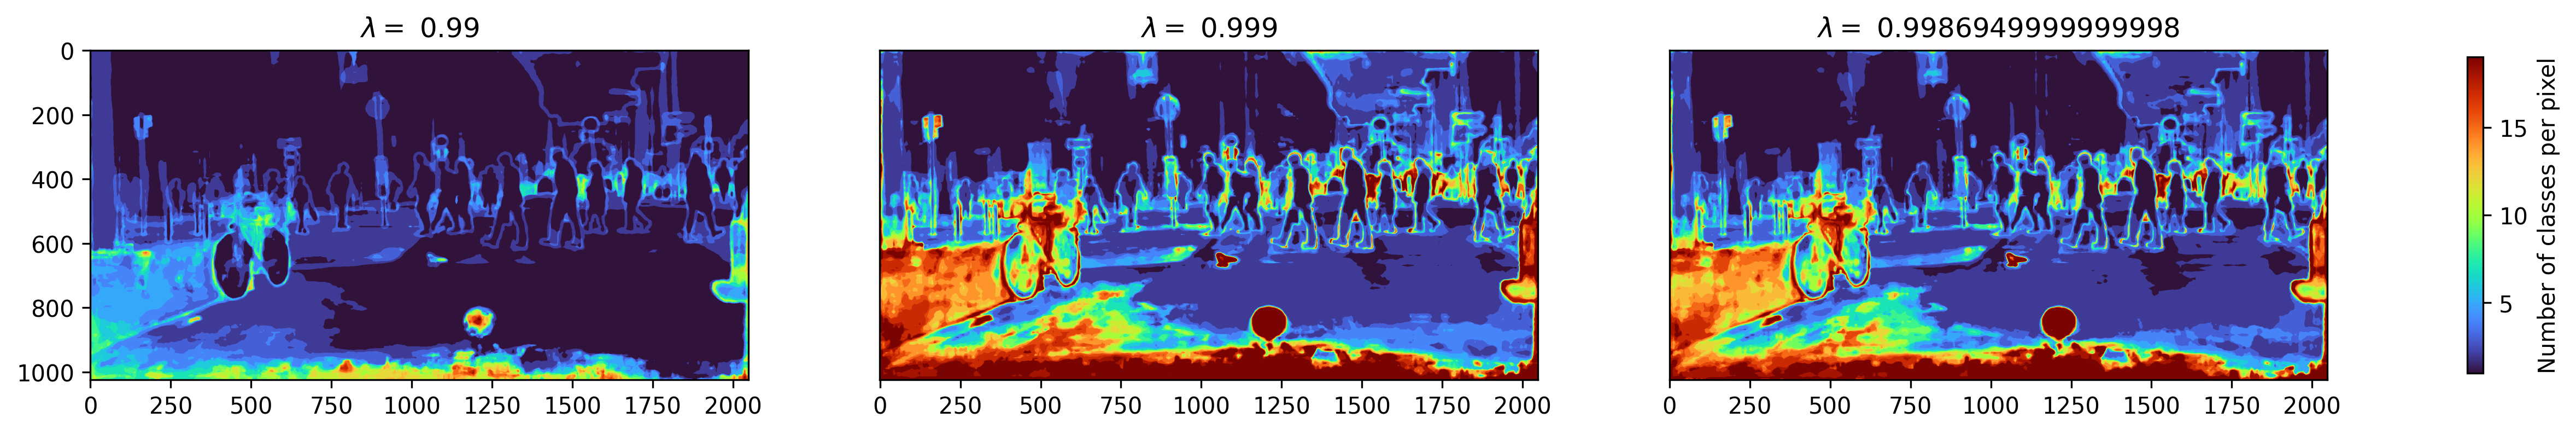

In [5]:
from make_figures import plot_threshold_heatmap_from_input_img_path


plot_threshold_heatmap_from_input_img_path(
    input_img_path=im_path,
    expe_config=my_config,
    # normalize_by_total_number_of_classes=False, #True,
    normalize_by_total_number_of_classes=True,
    lbd=[0.99, 0.999, my_config["optimal_lambda"]],
)

## Compare: bin loss, bin with threshold and miscoverage on same softmax output.

- Observe how the heatmap change according to our notion of error and the risk $\alpha$

Loads checkpoint by local backend from path: /home/luca.mossina/projects/vision/cose/models/Cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


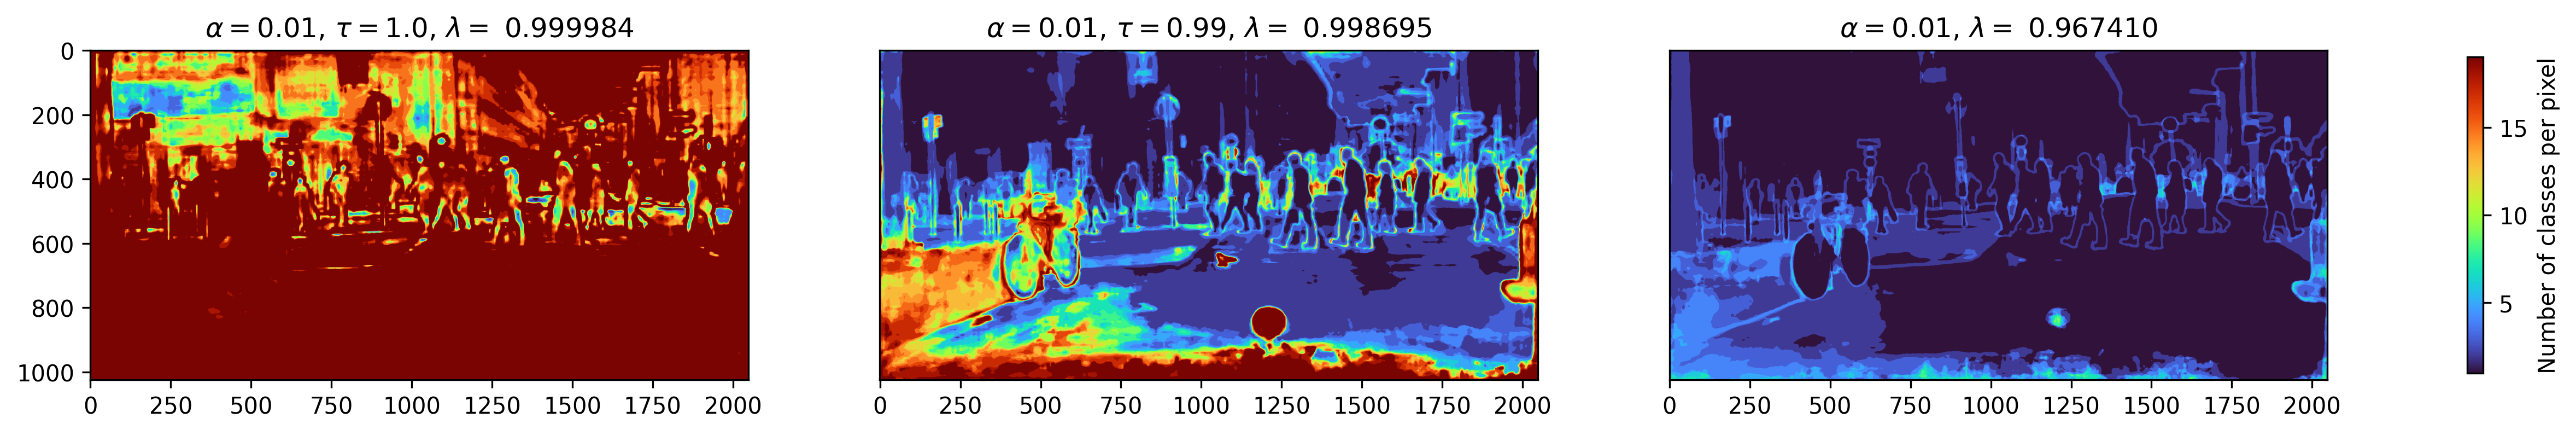

In [6]:
from make_figures import triple_threshold_heatmap_from_input_img_path

## For the same alpha, compare three losses: binary (mincov 1.0), bin with threshold, miscoverage
visu_loss_comparison = {
    "bin": f"{prj_path}/experiments/outputs/Cityscapes/binary_loss/specials/20240324_19h55m10s_Cityscapes__id_101__alpha_0.01__mincov_1.0__binary_loss.json",
    "threshold": f"{prj_path}/experiments/outputs/Cityscapes/binary_loss/20240315_14h13m06s_Cityscapes__id_101__alpha_0.01__binary_loss.json",
    "miscoverage": f"{prj_path}/experiments/outputs/Cityscapes/miscoverage_loss/20240302_21h57m00s_Cityscapes__id_101__alpha_0.01__miscoverage_loss.json",
}

thresholds = []

for config in visu_loss_comparison:
    my_config = json.load(open(visu_loss_comparison[config]))
    thresholds.append(my_config["optimal_lambda"])

titles = [
    "$\\alpha = 0.01$, $\\tau = 1.0$, ",
    "$\\alpha = 0.01$, $\\tau = 0.99$, ",
    "$\\alpha = 0.01$, ",
]

triple_threshold_heatmap_from_input_img_path(
    input_img_path=im_path,
    expe_config=my_config,
    normalize_by_total_number_of_classes=True,
    lbd=thresholds,
    titles=titles,
)